### Perkenalan

    Nama    : I Made Dhanan Pradipta
    Batch   : 10

#### Import library

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Loading

In [3]:
df = pd.read_csv('dataset/ks-projects-201801.csv')

In [4]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
df.shape

(378661, 15)

#### Data Cleaning

In [7]:
#cek duplikasi dari dataframe

print(f"banyak duplikasi: {df.duplicated().sum()}")

banyak duplikasi: 0


In [8]:
#karena type dari kolom launched dan deadline tidak sesuai, ubah kedalam bentuk datetime
df = df.astype({'deadline':'datetime64[ns]',
                'launched':'datetime64[ns]'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                378661 non-null  int64         
 1   name              378657 non-null  object        
 2   category          378661 non-null  object        
 3   main_category     378661 non-null  object        
 4   currency          378661 non-null  object        
 5   deadline          378661 non-null  datetime64[ns]
 6   goal              378661 non-null  float64       
 7   launched          378661 non-null  datetime64[ns]
 8   pledged           378661 non-null  float64       
 9   state             378661 non-null  object        
 10  backers           378661 non-null  int64         
 11  country           378661 non-null  object        
 12  usd pledged       374864 non-null  float64       
 13  usd_pledged_real  378661 non-null  float64       
 14  usd_

In [9]:
#cek missing value dari dataframe

df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [10]:
#hapus missing value dari dataframe

df.dropna(axis=0, inplace=True)

In [11]:
#cek kembali missing value

df.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [12]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


#### Eksplorasi Data

##### Central Tendency : Mean

    digunakan untuk mencari rata-rata dari sebuah kasus, dalam hal ini rata-rata goal yang dimiliki oleh setiap main category

In [13]:
df.groupby('main_category')['goal'].mean()

main_category
Art              40829.387205
Comics           20243.646297
Crafts           11592.285901
Dance            10313.452694
Design           46737.270070
Fashion          24817.556586
Film & Video     85464.242642
Food             48697.082467
Games            50715.815932
Journalism       88799.097240
Music            16626.141277
Photography      13004.394647
Publishing       29434.131821
Technology      119629.259419
Theater          27542.578410
Name: goal, dtype: float64

##### Central Tendency : Median

    median digunakan untuk mencari nilai tengah atau quartile 50%, pada kasus kali ini median dari goal yang dimiliki oleh setiap status

In [14]:
df['state'].value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

In [15]:
df.groupby('main_category')['goal'].median()

main_category
Art              3000.0
Comics           3500.0
Crafts           2400.0
Dance            3300.0
Design          10000.0
Fashion          5500.0
Film & Video     7000.0
Food            10000.0
Games            8000.0
Journalism       5000.0
Music            4000.0
Photography      4000.0
Publishing       5000.0
Technology      20000.0
Theater          3000.0
Name: goal, dtype: float64

##### Central Tendency : Mode

    mode mengukur value mana yang muncul paling banyak, dan pada kolom main category paling banyak ada Film & Video

In [16]:
df['main_category'].mode()

0    Film & Video
dtype: object

##### Variance : Range

    range pada goal yang memiliki status sukses adalah 1999999.9

In [17]:
success = df[df['state'] == 'successful']
print(str(success['goal'].max() - success['goal'].min()))

1999999.99


##### Variance : var

    variance menunjukan seberapa besar penyebaran pada data, mirip dengan standard deviasinya, sebaran pada kolom goal secara signifikan banyak terdapat sebaran

In [18]:
success['goal'].var()

976918923.9521409

##### Variance : Standard deviation

    standard deviasi data pada kolom goal tergolong besar, dan lebih besar dari mean nya, sehingga dapat digolongkan banyak terdapat sebaran pada data

In [25]:
success['goal'].mean()

10166.109761451165

In [19]:
success['goal'].std()

31255.702262981406

##### Confidence Interval

    ada 95% kemungkinan bahwa confidence interval [45715.58, 53330.39] benar bahwa populasi sebenarnya, goal rata-rata pada perusahaan di kickstarte

In [20]:
stats.t.interval(alpha=0.95, df=len(df['goal'])-1, loc=np.mean(df['goal']), scale=stats.sem(df['goal'])) 

(45715.58576911273, 53330.39191306193)

Kesimpulan

    berdasarkan analisis central tendecynya maka, didapat bahwa perusahaan yang bergerak di bidang 'Film and Video' paling banyak mencari peruntungan lewat kickstarter, namun dari sisi dana yang ingin dicapai kategori 'Technology' memiliki paling banyak goal, namun sayangnya secara keseluruhan perusahaan lebih banyak mengalamai kegagalan ketimbang kesuksesan di kickstarter. 

##### Hyphotesis Testing

pada kasus kali ini, kita akan mengecek apakah rata-rata goal pada perusahaan yang sukses di kickstarter apakah sama dengan rata-rata yang gagal
testing menggunakan two samples independent

In [21]:
#buat datafram yang sudah diseleksi dalam kondisi sukses dan gagal
success_goal = df[df['state'] == 'successful']['goal']
fail_goal = df[df['state'] == 'failed']['goal']

#print rata-rata dari goalnya
print('Average success kickstarter goals : {}'.format(np.round(success_goal.mean())))
print('Average fail kickstarter goals : {}'.format(np.round(fail_goal.mean())))

Average success kickstarter goals : 10166.0
Average fail kickstarter goals : 67363.0


Hypothesis testing nya :

**H0: μ_susccesful = μ_failed**

**H1: μ_successful != μ_failed**

In [22]:
#cek p-value dan t-statnya menggunakan two sample independent
t_stat, p_val = stats.ttest_ind(success_goal,fail_goal)
print('P-value:',p_val) 
print('t-statistics:',t_stat)

P-value: 2.475212857237182e-47
t-statistics: -14.453162296217993


C:\Users\danan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


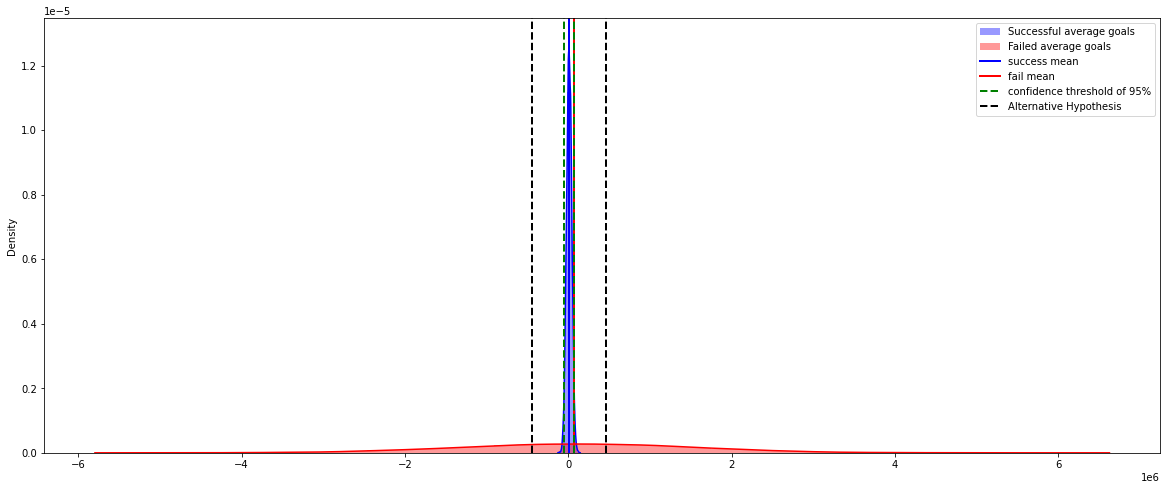

In [24]:
#visualisasikan kedalam plot sehingga mudah untuk dibaca
success_pop = np.random.normal(success_goal.mean(),success_goal.std(),10000)
fail_pop = np.random.normal(fail_goal.mean(),fail_goal.std(),10000)

ci = stats.norm.interval(0.95, success_goal.mean(), success_goal.std())
plt.figure(figsize=(20,8))
sns.distplot(success_pop, label='Successful average goals',color='blue')
sns.distplot(fail_pop, label='Failed average goals',color='red')

plt.axvline(success_goal.mean(), color='blue', linewidth=2, label='success mean')
plt.axvline(fail_goal.mean(), color='red',  linewidth=2, label='fail mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(success_pop.mean()+t_stat*success_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(success_pop.mean()-t_stat*success_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

#### Kesimpulan

    Dari hasil di atas, dapat kita simpulkan bahwa null hypothesis gagal, karena terdapat perbedaan secara sigifikan antara status yang sukses dengan status yang gagal secara rata-rata dari goal yang sudah diset dari awal, sehinggan kita bisa menggunakan alternate hypothesis